<center>
<img src="./pictures/ICA.png" style="float:left; max-width: 80px; display: inline" alt="ICA" /></a> 
<a href="https://r3asc18.sciencesconf.org/" ><img src="./pictures/web_R3ASC_20.png" style="max-width: 500px; display: inline"  alt="R3ASC"/></a> 
<img src="./pictures/logo-insa.jpg" style="float:right; max-width: 120px; display: inline" alt="INSA" /></a>
</center>

# Architecture of the actuator and sizing scenarios

*Written by Marc Budinger, INSA Toulouse, France*

Before sizing a system, it is important to define all the constraints that could have an influence on the design. It is therefore advisable to list meticulously:
- the power components to size in the architecture ([Architecture section](#Architecture))
- criteria and parameters useful for the selection of components ([Design drivers section](#DesignDrivers))
- system usage scenarios that can "activate" these sizing scenarios ([Sizing scenarios section](#SizingScenarios))


## Architecture and components<a name="Architecture"></a>



The actuator that we propose to size here is composed of:
- a permanent magnet synchronous motor
- a spur gear reducer
- a roller screw
- a thrust bearing
- 2 rod ends
- a tube / casing assembly (housing)

*TVC EMA actuator ([Sabca](![image.png](attachment:image.png))*
![P80](./pictures/P80_VEGA.png)
*EMA components*
![P80](./pictures/EMA_components.png)

Python can be use to represent the Work Breakdown Structure(WBS)of an architecture thanks to Graphviz graph diagram. 

Remark: 
- The Graphviz python wrapper can be installed with `conda install anaconda graphviz --force` and `conda install python-graphviz` for Anaconda python solution.   
- And you need also to install the [Graphviz visualization solution](https://www.graphviz.org/download/) (use the .msi install to have the 'PATH' well set-up)


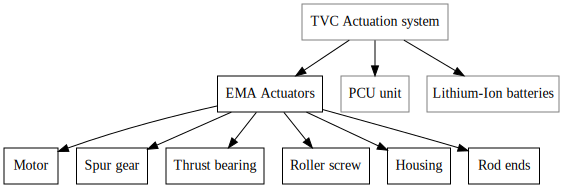

In [2]:
# Plot the WBS of the system
from graphviz import Digraph

dot = Digraph(comment='TVC Actuation system')
# System
dot.node('S', 'TVC Actuation system', shape='rectangle', color='grey')
# Equipments
dot.node('E1', 'EMA Actuators', shape='rectangle')
dot.node('E2', 'PCU unit', shape='rectangle', color='grey')
dot.node('E3', 'Lithium-Ion batteries', shape='rectangle', color='grey')
# Components
dot.node('C1', 'Motor', shape='rectangle')
dot.node('C2', 'Spur gear', shape='rectangle')
dot.node('C3', 'Thrust bearing', shape='rectangle')
dot.node('C4', 'Roller screw', shape='rectangle')
dot.node('C5', 'Housing', shape='rectangle')
dot.node('C6', 'Rod ends', shape='rectangle')
# Diagram
dot.edge('S','E1')
dot.edge('S','E2')
dot.edge('S','E3')
dot.edge('E1','C1')
dot.edge('E1','C2')
dot.edge('E1','C3')
dot.edge('E1','C4')
dot.edge('E1','C5')
dot.edge('E1','C6')
# Render the graph into the notebook
dot

## Design drivers<a name="DesignDrivers"></a>




We are going to determine here the possible reasons of the degradation in system’s components. These degration can be:
- Fast and come from transient power demands (such as permanent deformation, rupture)
- Gradual and come from continuous power demands which often reduce the component’s and therefore the system’s lifetime (such as mechanical fatigue)

The component can also have imperfections which can increase the mechanical stresses on itself or other components.
For example, the inertia of a electrical motor increases the torque this same motor has to deliver or can destroy mechanical component when a sudden stop occurs.

We will complete the graph with possible sources of degradation (represented as ellipes).



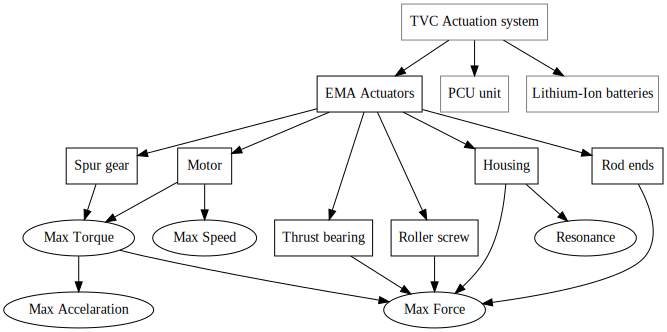

In [2]:
# Design driver
# Motor
dot.node('DD1', 'Max Torque')
dot.node('DD12', 'Max Accelaration')

dot.edge('C1', 'DD1')
dot.edge('DD1', 'DD12')

dot.node('DD2', 'Max Speed')
dot.edge('C1', 'DD2')

# Spur Gear
dot.edge('C2', 'DD1')

# Thrust bearing
dot.node('DD3', 'Max Force')
dot.edge('C3', 'DD3')
dot.edge('C4', 'DD3')
dot.edge('C5', 'DD3')
dot.edge('C6', 'DD3')

dot.edge('DD1', 'DD3')

# Housing
# Thrust bearing
dot.node('DD4', 'Resonance')
dot.edge('C5', 'DD4')


# Render the graph into the notebook
dot

## Sizing scenarios<a name="SizingScenarios"></a>

We have listed the different degradation risks for our application. Now we have to find the system uses which can create this degradation risks. These sizing scenarios are added on the graph as hexagon. 

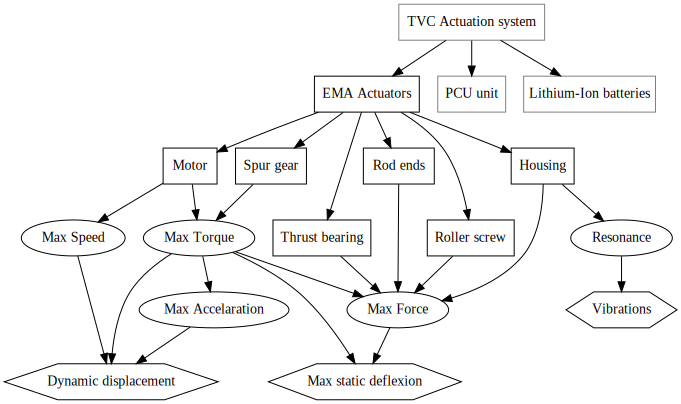

In [3]:
# Sizing scenarios

dot.node('SS1', 'Max static deflexion', shape='hexagon')
dot.node('SS2', 'Dynamic displacement', shape='hexagon')
dot.node('SS3', 'Vibrations', shape='hexagon')

dot.edge('DD1', 'SS1')
dot.edge('DD3', 'SS1')

dot.edge('DD2', 'SS2')
dot.edge('DD1', 'SS2')
dot.edge('DD12', 'SS2')

dot.edge('DD4', 'SS3')

# Render the graph into the notebook
dot
